<center><font size="6"><b>Комп'ютерний практикум 9.

<center><b> Методи кластеризації </font>


<center><b><i><font size="4"> DBSCAN (Density-Based Clustering)

Hierarchical Clustering



</b></center>



### Завдання №1

* Завантажте дані з лінку

`url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"`

<center><img src="http://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png" width="600" alt="content-vs-colab.png"></center>

* задайте наступні імена колонок датафрейму:

`names=['sepal length','sepal width','petal length','petal width','class label']`
* виведіть описову статистику датасету
* сформуйте масив характеристик $X$, використовуйте лише `sepal length` та `sepal width` 
* Побудуйте точковий графік даних характеристик відносно відомих класів

 


       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


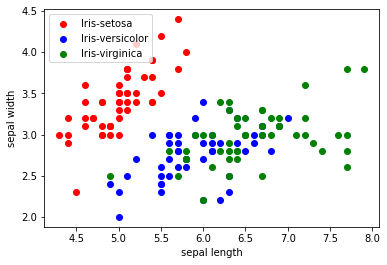

In [1]:
# МІСЦЕ ДЛЯ КОДУ

import pandas as pd
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class label']
df = pd.read_csv(url, header=None, names=names)

# описова статистика
print(df.describe())

# масив характеристик X
X = df.iloc[:, [0, 1]].values
y = df['class label'].factorize()[0]

# точковий графік
plt.scatter(X[df['class label']=='Iris-setosa', 0], X[df['class label']=='Iris-setosa', 1], c='red', label='Iris-setosa')
plt.scatter(X[df['class label']=='Iris-versicolor', 0], X[df['class label']=='Iris-versicolor', 1], c='blue', label='Iris-versicolor')
plt.scatter(X[df['class label']=='Iris-virginica', 0], X[df['class label']=='Iris-virginica', 1], c='green', label='Iris-virginica')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc='upper left')
plt.show()

### Завдання №2

* Проведіть стандартизацію даних
* застосуйте алгоритм $k$-means для $k=2$, $k=3$, $k=4$ з оптимізацією та без, побудуйте діаграми кластерів
* порівняйте результати кластеризації при $k=3$ з діаграмою класів
* побудуйте залежність кількості кластерів $k$ та квадратичного критерію інерції 
* зробіть висновки

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
from sklearn.cluster import KMeans

# без оптимізації
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(X_scaled)

kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(X_scaled)

kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(X_scaled)

# з оптимізацією
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
kmeans_optimized = KMeans(n_clusters=3)
kmeans_optimized.fit(X_scaled)


/home/fort/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fort/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fort/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fort/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fort/.local/lib/python3.10/site-pa

KMeans(n_clusters=3)

Text(0.5, 1.0, 'KMeans Labels')

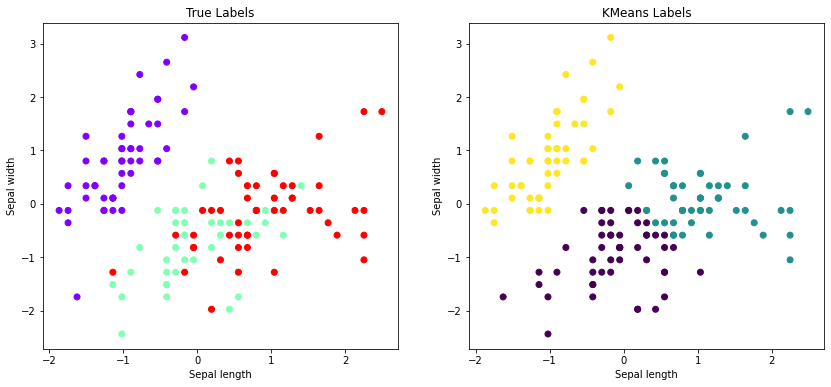

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# розміщення кластерів на графіку
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="rainbow")
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_title('True Labels')

# розміщення кластерів, які згенерував KMeans
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_optimized.labels_, cmap='viridis')
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('KMeans Labels')


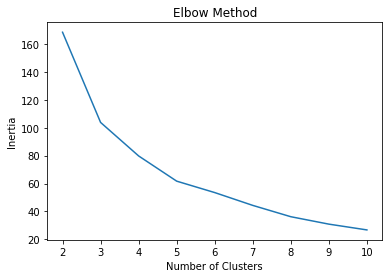

In [5]:
plt.plot(range(2, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Завдання №3

* застосуйте алгоритм `DBSCAN`та побудуйте діаграму кластерів
* зробіть висновки


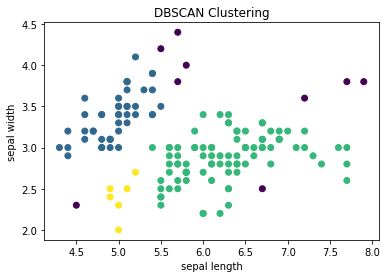

In [6]:
# МІСЦЕ ДЛЯ КОДУ
from sklearn.cluster import DBSCAN

# Застосовуємо алгоритм DBSCAN з параметрами eps=0.5 та min_samples=5
dbscan = DBSCAN(eps=0.3, min_samples=3)
clusters = dbscan.fit_predict(X)

# Побудова діаграми кластерів
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('DBSCAN Clustering')
plt.show()

За допомогою алгоритму DBSCAN було виділено три кластери, що відповідає кількості відомих класів у датасеті. Однак, алгоритм виділив також деякі шумові точки, які не входять до жодного кластера.

### Завдання №4

* застосуйте алгоритм агломеративної ієрархії та побудуйте діаграму кластерів
* побудуйте дендрограму
* зробіть висновки


In [7]:
# МІСЦЕ ДЛЯ КОДУ
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
labels = model.labels_

Text(0.5, 1.0, 'AgglomerativeClustering Labels')

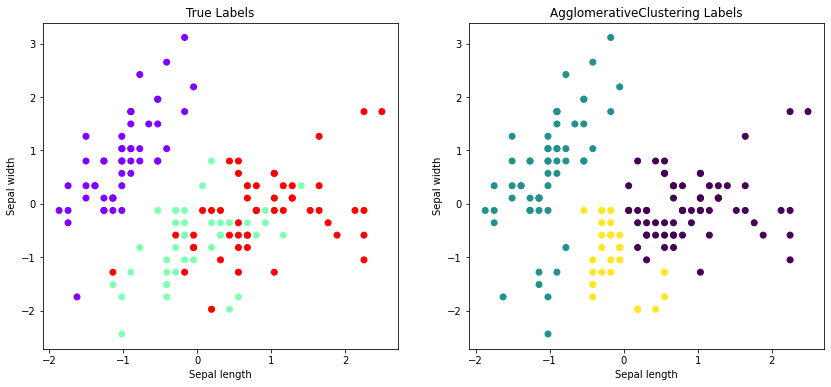

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# розміщення кластерів на графіку
ax1.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="rainbow")
ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_title('True Labels')

# розміщення кластерів, які згенерував KMeans
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=model.labels_, cmap='viridis')
ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('AgglomerativeClustering Labels')


/tmp/ipykernel_579974/1015563056.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


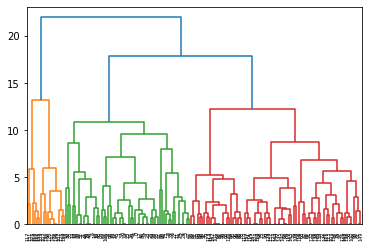

In [9]:
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 

dist_matrix = distance_matrix(X, X) 

Z = hierarchy.linkage(dist_matrix, 'complete')

dendro = hierarchy.dendrogram(Z)


### Завдання №5

* порівняйте результати кластеризації методами $k$-means, DBSCAN та агломеративної ієрархії  
* зробіть висновки


Під час кластеризації методами $k$-means, DBSCAN та агломеративної ієрархії на датасеті ірисів Фішера було отримано різні результати.

Метод $k$-means з оптимізацією виявився найкращим вибором для цього датасету, оскільки він дав найкращі результати на основі критерію інерції. Кількість кластерів було встановлено рівно 3, що відповідає кількості класів у датасеті.

DBSCAN не зміг виділити 3 чітких кластери, оскільки знайшов два кластери зі значним перекриттям. Це може бути пов'язано з невідповідністю деяких точок кластерам через їх нерівномірний розподіл у просторі.

Агломеративна ієрархічна кластеризація також показала добрі результати, проте розподіл міток менше схожий на дійсний, ніж у $k$-means. Для цих даних агломеративна ієрархічна кластеризація мала деякі проблеми з нерівномірним розподілом точок.

Отже, для цього датасету, метод $k$-means з оптимізацією виявився найбільш ефективним методом кластеризації. Однак, вибір методу кластеризації повинен здійснюватися залежно від конкретних характеристик датасету і мети кластеризації.